### Comparing the fitness-complexity model of Pietroneros' work on economy-product export matrix with the steady state probabilites in a Markov chain model, developed based on Input-Outout matrix
### Here, we just use a random Markov chains and seemingly, the fitness values correlates almost 100% with the Pi values.
### Further, it can be seen that the complexity values are almost independent as fitness values

In [18]:
import numpy as np
from matplotlib import pyplot as plt
import time
from scipy.linalg import norm
%matplotlib inline

In [19]:
# Ref: http://www.nature.com/articles/srep00723
def calculate_pietronero_fitness(W,iteration_n):
    Fn_ = np.ones((W.shape[0],1))
    Qn_ = np.ones((W.shape[1],1))
    for i in range(iteration_n):
        Fn = W.dot(Qn_)
        Qn = 1/(W.T.dot(1/Fn_))
        Fn_ = Fn/Fn.sum()
        Qn_ = Qn/Qn.sum()
    return Fn_,Qn_



# power iteration to calculate the steady state probabilites of a row normalized Markov Chain
def simulate_markov(TM,verbose='on'):
    e1 = time.time()
    states_n = TM.shape[0]
    pi = np.ones(states_n);  pi1 = np.zeros(states_n);
    pi = np.random.rand(states_n)
    # pi[np.random.randint(1,high=size-1, size=1000)] = 1;
    

#     pi[np.random.randint(1,high=states_n, size=int(.1*states_n))] = np.random.rand(int(.1*states_n));
    pi = pi/pi.sum()
#     print pi.shape
#     print pi.sum()
    # pi[range(int(.1*size))] = 1;

    n = norm(pi - pi1); i = 0;
    diff = []
    while n > 1e-6 and i <1*1e4 :
        pi1 = TM.T.dot(pi).copy()
        n = norm(pi - pi1); i += 1
        diff.append(n)
        pi = pi1.copy()
    if verbose=='on':
        print "Iterating {} times in {}".format(i, time.time() - e1)
    
    mixing_ = i

    return pi1,mixing_

In [22]:
#Toy examples: We initiate random matrices and then by normalizing over columns we get row stochastic Markov Chains
# Here, each row indicates the amount of money goes from a industry in an economy to another industry. 
# If we want to see this as a an economy-product export model, then the each column shows how much money each node receives.
# Therefore, by transposing the transition matrix of the constructed markov chain, we can assume that we have the same 
# column normalized matrix as Pietronero's work, where each element shows the export share of each node (in their case, each economy)
# in each product

# size of the nodes
sz= 2000
sample_TM = np.random.rand(sz,sz)
for i in range(sample_TM.shape[0]):
    s= sum(sample_TM[i])
    if s==0:
        sample_TM[i]=eps
        sample_TM[i,i]=1.
        s= sum(sample_TM[i])
        sample_TM[i]=np.divide(sample_TM[i],s)
    else:
        sample_TM[i]=np.divide(sample_TM[i],s)   


Iterating 4 times in 0.00523996353149


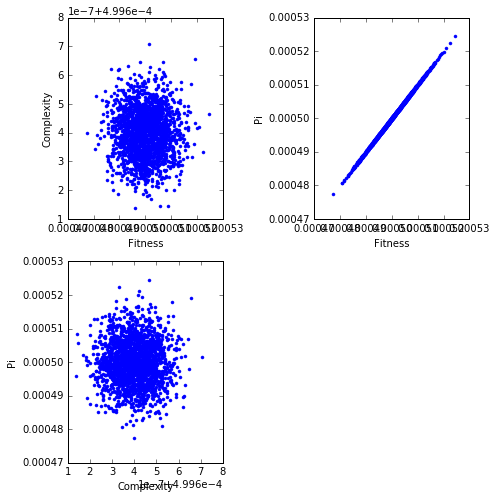

In [23]:

# We use power iteration to get the steady state Pis
sample_pi,sample_mixing_ = simulate_markov(sample_TM)



# In this case, considering 
W = sample_TM.T.copy()
pi = sample_pi[:,np.newaxis]
iteration_n = 500
sample_Fn_,sample_Qn_ = calculate_pietronero_fitness(W,iteration_n)   

# print sample_Fn_.shape,sample_Qn_.shape,pi.shape, W.shape


fig = plt.figure(figsize=(7,7))
plt.subplot(2,2,1)
p = plt.plot(sample_Fn_,sample_Qn_,'.')
plt.xlabel('Fitness')
plt.ylabel('Complexity')
plt.subplot(2,2,2)
p = plt.plot(sample_Fn_,sample_pi,'.')
plt.xlabel('Fitness')
plt.ylabel('Pi')
plt.subplot(2,2,3)
p = plt.plot(sample_Qn_,sample_pi,'.')
plt.xlabel('Complexity')
plt.ylabel('Pi')
plt.tight_layout()
# print np.corrcoef(np.concatenate((np.log(sample_Fn_),np.log(pi)),axis=1).T)

In [24]:
print "Pearson product-moment correlation coefficients: {}".format(np.corrcoef(np.concatenate((sample_Fn_,pi),axis=1).T)[0,1])
import scipy.stats as statmodel
print "Spearman rank-order correlation coefficient: {}".format(statmodel.stats.spearmanr(np.concatenate((sample_Fn_,pi),axis=1)).correlation)

Pearson product-moment correlation coefficients: 0.999917414304
Spearman rank-order correlation coefficient: 0.999896723474
